<a href="https://colab.research.google.com/github/AnkurSahoo45/AnkurSahoo45/blob/main/emotionDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ankursahoo","key":"d20ade8f751fd9063c52b229ca45a666"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download ankursahoo/project-dataset

 91% 33.0M/36.3M [00:02<00:00, 24.3MB/s]
100% 36.3M/36.3M [00:02<00:00, 16.9MB/s]


In [ ]:
!mkdir project-dataset

In [ ]:
!unzip project-dataset.zip -d project-dataset

Streaming output truncated to the last 5000 lines.
  inflating: project-dataset/dataset_copy/train/not_depressed/Training_63101155.jpg  
  inflating: project-dataset/dataset_copy/train/not_depressed/Training_63102095.jpg  
  inflating: project-dataset/dataset_copy/train/not_depressed/Training_6310242.jpg  
  inflating: project-dataset/dataset_copy/train/not_depressed/Training_63103479.jpg  
  inflating: project-dataset/dataset_copy/train/not_depressed/Training_63104919.jpg  
  inflating: project-dataset/dataset_copy/train/not_depressed/Training_63109430.jpg  
  inflating: project-dataset/dataset_copy/train/not_depressed/Training_63119224.jpg  
  inflating: project-dataset/dataset_copy/train/not_depressed/Training_6312930.jpg  
  inflating: project-dataset/dataset_copy/train/not_depressed/Training_63156448.jpg  
  inflating: project-dataset/dataset_copy/train/not_depressed/Training_6315722.jpg  
  inflating: project-dataset/dataset_copy/train/not_depressed/Training_63158593.jpg  
  infl

In [ ]:
from keras.utils import to_categorical, load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
import os
import pandas as pd
import numpy as np

In [ ]:
TRAIN_DIR = '/content/project-dataset/dataset_copy/train'
TEST_DIR = '/content/project-dataset/dataset_copy/test'
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
    return image_paths,labels

In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

In [ ]:
train.shape

(17010, 2)

In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

In [ ]:
test.shape

(4254, 2)

<Axes: xlabel='label', ylabel='count'>

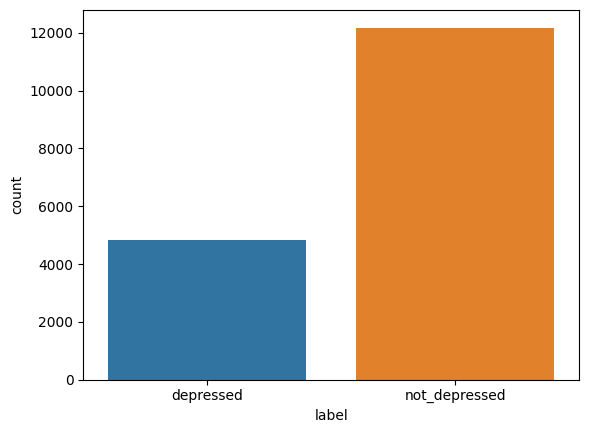

In [ ]:
import seaborn as sns
sns.countplot(x='label', data = train)

<Axes: xlabel='label', ylabel='count'>

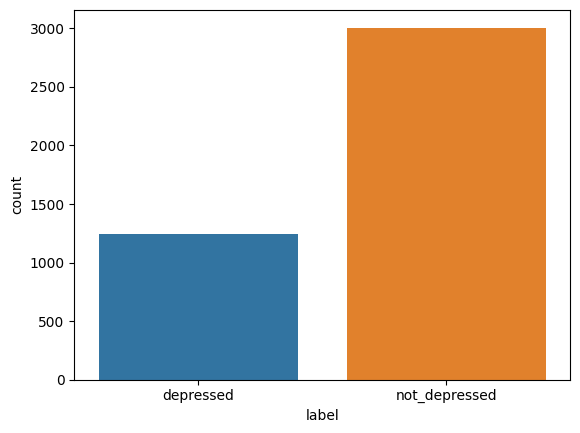

In [ ]:
sns.countplot(x='label', data = test)

In [ ]:
from tqdm import tqdm
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode = "grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [ ]:
train_features = extract_features(train['image'])

100%|██████████| 17010/17010 [00:02<00:00, 6768.21it/s]


In [ ]:
test_features = extract_features(test['image'])

100%|██████████| 4254/4254 [00:00<00:00, 7428.75it/s]


In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# output layer
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 128)       1280      
                                                                 
 batch_normalization_6 (Bat  (None, 46, 46, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 128)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 23, 23, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 batch_normalization_7 (Bat  (None, 21, 21, 256)      

In [ ]:
history = model.fit(x= x_train,y = y_train, epochs = 50, validation_data = (x_test,y_test))

Epoch 1/50
532/532 [==============================] - 35s 30ms/step - loss: 0.7011 - accuracy: 0.6593 - val_loss: 0.6818 - val_accuracy: 0.7069
Epoch 2/50
532/532 [==============================] - 15s 28ms/step - loss: 0.5818 - accuracy: 0.7032 - val_loss: 0.5647 - val_accuracy: 0.7165
Epoch 3/50
532/532 [==============================] - 15s 28ms/step - loss: 0.5399 - accuracy: 0.7230 - val_loss: 0.5629 - val_accuracy: 0.6975
Epoch 4/50
532/532 [==============================] - 16s 30ms/step - loss: 0.5143 - accuracy: 0.7337 - val_loss: 0.5124 - val_accuracy: 0.7435
Epoch 5/50
532/532 [==============================] - 16s 30ms/step - loss: 0.4907 - accuracy: 0.7520 - val_loss: 0.6721 - val_accuracy: 0.7083
Epoch 6/50
532/532 [==============================] - 16s 29ms/step - loss: 0.4739 - accuracy: 0.7620 - val_loss: 0.4738 - val_accuracy: 0.7607
Epoch 7/50
532/532 [==============================] - 15s 27ms/step - loss: 0.4563 - accuracy: 0.7744 - val_loss: 0.5587 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test)

133/133 [==============================] - 1s 7ms/step - loss: 0.5973 - accuracy: 0.8155


[0.5973132252693176, 0.8154677748680115]

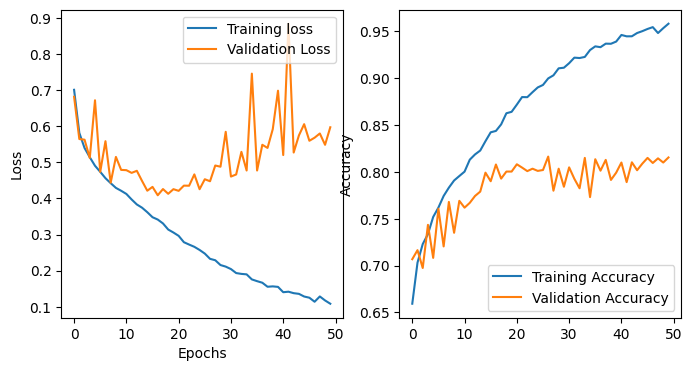

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model_json = model.to_json()
with open("model.json",'w') as json_file:
    json_file.write(model_json)
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis = 1)

133/133 [==============================] - 1s 5ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(le.transform(test['label']), y_pred))

              precision    recall  f1-score   support

           0       0.71      0.62      0.66      1247
           1       0.85      0.90      0.87      3007

    accuracy                           0.82      4254
   macro avg       0.78      0.76      0.77      4254
weighted avg       0.81      0.82      0.81      4254



In [ ]:
matrix = confusion_matrix(le.transform(test['label']), y_pred)
print(matrix)

[[ 773  474]
 [ 311 2696]]


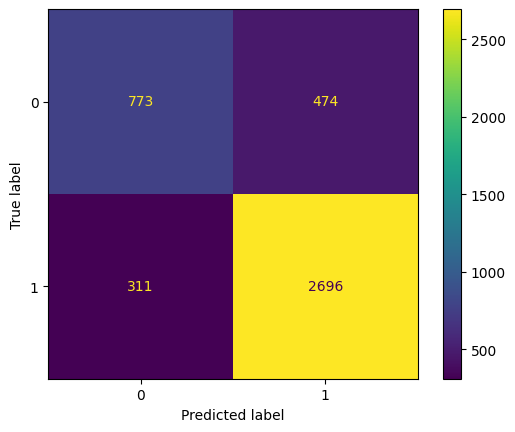

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(matrix)
display.plot()